<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase7_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 7 (Viernes 4 de abril, 2025)
---

# Vectores y Valores Propios (Strang I.6)

Los vectores propios de una matriz (cuadrada) $A$ son vectores que no cambian de dirección cuando los multiplicamos por $A$. El producto $Ax$ está en la misma línea que $x$:

$$
Ax = \lambda x
$$

Observar que es fundamental que la matriz sea cuadrada, (no tiene sentido hablar de un vector propio en el caso rectangular).

Esto significa que:
- $x$ es *vector propio* de $A$
- $\lambda$ es *valor propio* de $A$

Si multiplicamos de nuevo por $A$, obtenemos:

$$
A^2 x = A(Ax) = A(\lambda x) = \lambda (Ax) = \lambda^2 x
$$

Por tanto:
- $x$ sigue siendo eigenvector de $A^2$
- su eigenvalor se convierte en $\lambda^2$

En general:

$$
A^k x = \lambda^k x \quad \text{para } k = 1, 2, 3, \dots
$$
Si $A$ fuera invertible tendríamos
$$
A^{-1} x = \frac{1}{\lambda} x \quad \text{si } \lambda \ne 0
$$

Supongamos que la matriz $n\times n$ $A$ tiene $n$ vectores propios independientes $x_1, \dots, x_n$ con valores propios distintos $\lambda_1, \dots, \lambda_n$. Entonces cualquier vector $v$ en $\mathbb{R}^n$ puede escribirse como combinación lineal de los eigenvectores:

$$
v = c_1 x_1 + c_2 x_2 + \dots + c_n x_n
$$

Entonces:

$$
Av = c_1 \lambda_1 x_1 + c_2 \lambda_2 x_2 + \dots + c_n \lambda_n x_n \\
\vdots\\
A^k v = c_1 \lambda_1^k x_1 + c_2 \lambda_2^k x_2 + \dots + c_n \lambda_n^k x_n
$$

Esto significa que si $|\lambda_1| > 1$, esa componente crecerá con $k$.  
Si $|\lambda_2| < 1$, entonces esa componente se atenuará.  
**Por eso es importante estudiar cada vector propio por separado.**

---

**Observación:**

En el caso anterior tenemos que si $X$ es la matriz de vectores propios
$$
X=(x_1,\ldots,x_n),
$$
(que en particular es invertible) y $D$ es la matriz diagonal con los valores propios
$$
 D=\textrm{diag}(\lambda_1,\ldots,\lambda_n)
$$
tenemos que
$$AX=XD.$$

O análogamente,
$$
A=XDX^{-1}.
$$
Recordar que cuando $A$ tiene una base de vectores propios, entonces $A$ se dice **diagonalizable**.

En particular tenemos
$$
A^k=\overbrace{XDX^{-1}\cdot XDX^{-1}\cdots XDX^{-1}}^{k\,\mbox{veces}}\\
=XD(X^{-1}X)DX^{-1}\cdots XDX^{-1}= XD^kX^{-1}.
$$
es decir
$$
A^k=XD^kX^{-1}.
$$
Con esta observación obtenemos lo que ya mencionamos, $A^k$ tiene los mismos vectores propios que $A$ (i.e. las columnas de $x_i$), y los valores propios asociados son $\lambda_i^k$.

Dado un vector $v\in\mathbb{R}^n$, la dinámica $A^kv$ puede ser entendida de la siguiente manera:
- $X^{-1}v$ es el vector con coeficientes de $v$ en la base de vectores propios. (si $v=c_1x_1+\cdots+c_nx_n$, entonces $c=X^{-1}v$).
- $D^kX^{-1}v$ multiplica los coeficientes $c_i$ por $\lambda_i^k$
- $XD^kX^{-1}v$ nos da el resultado final de $c_1\lambda_1^kx_1+\cdots c_n\lambda_n^kx_n$

En el fondo, lo importante e interesante de las matrices diagonalizables, es que se pueden pensar como matrices diagonales. Solo recordando que la base en que se diagonalizan es la base de vectores propios.

### Ejemplo numérico:

Sea
$$
S = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
$$

Tiene vectores propios:
- $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ con $\lambda = 3$
- $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$ con $\lambda = 1$

Entonces las potencias $S^k$ crecerán como $3^k$.


In [ ]:
S=[2 1;1 2]

2×2 Matrix{Int64}:
 2  1
 1  2

In [ ]:
S*[1,1]

2-element Vector{Int64}:
 3
 3

In [ ]:
S*[1,-1]

2-element Vector{Int64}:
  1
 -1

In [ ]:
# En Julia el comando eigen() da los valores y vectores propios
L,V=eigen(S)
println(L)
println(V)

[1.0, 3.0]
[-0.7071067811865475 0.7071067811865475; 0.7071067811865475 0.7071067811865475]


In [ ]:
println(rank([[1,1] V[:,2]]),",",rank([[1,-1] V[:,1]])) # veamos que son colineales


1,1


Consideremos un ejemplo más interesante, donde intentaremos ver qué sucede cuando a operamos sobre un vector (o dirección) con potencias de una matriz.

Consideremos una matriz $A$ con valores propios $2$ y $1/2$.

In [ ]:
#  Matriz con eigenvalores 2 y 1/2
D = [2.0 0.0; 0.0 0.5]  # diagonal, para asegurar autovalores deseados
# La giramos, y que parezca un accidente
X=randn(2,2)
A=X*D*inv(X) # AX=DX

2×2 Matrix{Float64}:
  1.7405   -0.262033
 -1.22851   0.759499

Veamos que $X$ contiene los vectores propios:

In [ ]:
norm(A*X-X*D)

4.518280359883027e-16

In [ ]:
# Generamos un vector uniforme en el círculo unitario
θ = 2π * rand()
v0 = [cos(θ), sin(θ)]

println("Vector inicial v₀:")
display(v0)

# Normalizamos
v = v0 / norm(v0)

# Almacenamos trayectorias para graficar
trajectory = [v]


Vector inicial v₀:


2-element Vector{Float64}:
 -0.9298355603961795
  0.36797531251800414

1-element Vector{Vector{Float64}}:
 [-0.9298355603961795, 0.36797531251800414]

Ahora queremos realizar las iteraciones $A^kv$ y observar su asintótica. (Para que no explote la compu, y tengamos que evacuar, vamos normalizando en cada paso).

In [ ]:
# Iteraciones del método de la potencia
for _ in 1:20
    v = A * v
    v = v / norm(v)
    push!(trajectory, v)
end

?A qué dirección debería acercarse $A^kv$?

In [ ]:
# Vector propio (corresponde a eigenvalor 2)
v_dom = X[:,1]
A*v ==2*v

false

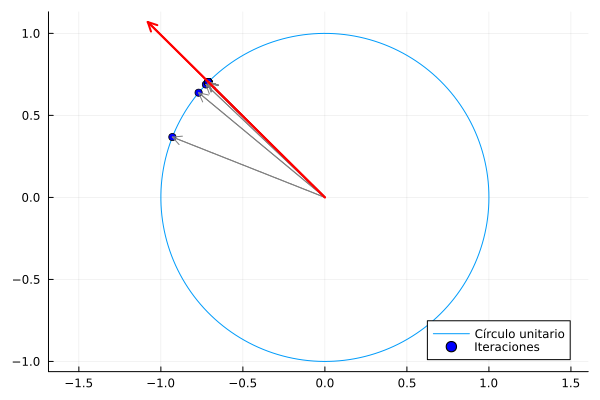

In [ ]:
# Graficamos el círculo unitario y las iteraciones
θs = range(0, 2π, length=200)
circle_x = cos.(θs)
circle_y = sin.(θs)

# Separar componentes
x_vals = [v[1] for v in trajectory]
y_vals = [v[2] for v in trajectory]

# Ploteo
plot(circle_x, circle_y, label="Círculo unitario", aspect_ratio=1, legend=:bottomright)
scatter!(x_vals, y_vals, label="Iteraciones", marker=:circle, color=:blue)

# Dibujar flechas desde el origen a cada punto de la trayectoria
for v in trajectory
    quiver!([0.0], [0.0], quiver=([v[1]], [v[2]]), arrow=true, color=:gray, label=false)
end

# Flecha para el eigenvector dominante
quiver!([0.0], [0.0], quiver=([v_dom[1]], [v_dom[2]]), arrow=true, color=:red, lw=2, label="Vector propio dominante")

Veamos un ejemplo más elaborado en el espacio.

Vector inicial v₀:


3-element Vector{Float64}:
  0.6768061718101133
 -0.6609384112713014
  0.3241817735559904

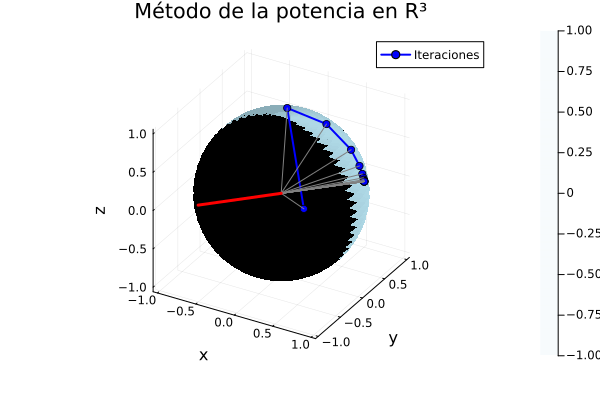

In [ ]:
using LinearAlgebra
using Plots

# Matriz con autovalores reales y distintos
D = Diagonal([3.0, 1.5, 0.2])
X = randn(3,3)
A = X * D * inv(X)  # A = X D X⁻¹

# Vector aleatorio en la esfera unitaria de R³
v0 = randn(3)
v0 /= norm(v0)

println("Vector inicial v₀:")
display(v0)

# Método de la potencia
v = v0
trajectory = [v]

for _ in 1:20
    v = A * v
    v = v / norm(v)
    push!(trajectory, v)
end

# Vector propio dominante
v_dom = X[:,1]
v_dom /= norm(v_dom)

# Traer coordenadas
x_vals = [v[1] for v in trajectory]
y_vals = [v[2] for v in trajectory]
z_vals = [v[3] for v in trajectory]

# Crear una malla para graficar la esfera unitaria
φ = range(0, 2π, length=60)
θ = range(0, π, length=30)
sphere_x = [sin(t)*cos(p) for t in θ, p in φ]
sphere_y = [sin(t)*sin(p) for t in θ, p in φ]
sphere_z = [cos(t) for t in θ, _ in φ]

# Graficar esfera
plot3d(sphere_x, sphere_y, sphere_z, st=:surface, alpha=0.1, label="", color=:lightblue)

# Trayectoria del método de la potencia
plot3d!(x_vals, y_vals, z_vals, label="Iteraciones", marker=:circle, color=:blue, lw=2)

# Flechas desde el origen
for v in trajectory
    quiver!([0.0], [0.0], [0.0], quiver=([v[1]], [v[2]], [v[3]]), arrow=true, color=:gray, label=false)
end

# Eigenvector dominante
quiver!([0.0], [0.0], [0.0], quiver=([v_dom[1]], [v_dom[2]], [v_dom[3]]), arrow=true, color=:red, lw=3, label="Eigenvector dominante")

# Estética general
plot!(title="Método de la potencia en R³", legend=:topright, xlabel="x", ylabel="y", zlabel="z")


---

### Propiedades importantes y comentarios sobre el espectro:

Si conocemos el espectro de una matriz, varias caracterísiticas de la matriz son conocidas. Por ejemplo, en nuestro caso
$$
S = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
$$

Con valores y vectores propios:
- $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ con $\lambda = 3$
- $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$ con $\lambda = 1$
Satisface:

1. **Traza**: $\lambda_1 + \lambda_2 = \text{tr}(S) = 4$
2. **Determinante**: $\lambda_1 \lambda_2 = \det(S) = 3$
3. **Valores propios reales**: si $S$ es simétrica, todos los $\lambda$ son reales
4. **Vectores propios ortogonales**: si $S$ es simétrica y $\lambda_1 \ne \lambda_2$, entonces $x_1 \cdot x_2 = 0$


**Ejercicio:** Cómo son los valores propios de la matriz de Householder?

**Ejercicio:** Cómo son los valores propios de matrices ortogonales?

Vale la pena recordar un poco sobre números complejos $\mathbb{C}$.

(to be continued...)

## Cómo se encuentran los valores propios?

Observar que si $v$ es vector propio de $A$ con valor propio $\lambda$ entonces
$$
Av=\lambda v, \quad \mbox{y por lo tanto}\quad (A-\lambda \textrm{Id})v=0.
$$
Eso implica que la matriz $A-\lambda \textrm{Id}$ tiene núcleo no trivial y por tanto su determinante vale cero.

Recíprocamente si la matriz $A-z\textrm{Id}$ tiene determinante cero, entonces cualquier vector $w$ no nulo $z$ en el núcleo satisface $Aw=zw$ y por lo tanto  $z$ es valor propio.

---

En resumen, algo que ya sabían, los valores propios de $A$ son las raíces del polinomio
$$
\chi_A(z)=\det(A-z\textrm{Id}).
$$
siendo $\chi_A$ el polinomio caracterísitco de $A$.

---
